# Task 1

---

## Web scraping and analysis

This Colab notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Initial setup:
#This sets the base URL for British Airways reviews, the number of pages to scrape (10), and the number of reviews per page (100)
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100


#Initialization:
#These lines initialize empty lists to store various data and an empty DataFrame.
reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1): This loop iterates through each page of reviews.
for i in range(1, pages + 1):

    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]

        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)

        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())

        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = pd.concat([df, data_dict], ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df.sample(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
1,Solo Leisure,Economy Class,Keflavik to Cape Town via London,October 2024,2.0,2.0,1.0,NaN,1.0,NaN,2,no,A350,"✅ Trip Verified | Disappointing service, pla..."
600,Couple Leisure,Economy Class,Santorini to Los Angeles via London,April 2022,1.0,1.0,1.0,NaN,1.0,NaN,1,no,NaN,✅ Trip Verified | British Airways is the most ...
176,Solo Leisure,Economy Class,London to Frankfurt,June 2023,1.0,NaN,NaN,NaN,1.0,NaN,1,no,NaN,✅ Trip Verified | I was going to fly to Frank...
868,Couple Leisure,Business Class,Johannesburg to London,December 2019,3.0,3.0,3.0,3.0,3.0,NaN,4,yes,A380,✅ Trip Verified | Johannesburg to London. The...
42,Solo Leisure,First Class,Manchester to Newark via London,August 2024,5.0,5.0,4.0,4.0,4.0,3.0,5,yes,Boeing 787,Not Verified | Although all four flights were ...


In [ ]:
df.to_csv("BA_reviews.csv", index=False)

Now we have our dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df = pd.read_csv('BA_reviews.csv')

## Data Cleaning

In [ ]:
df.shape

(1000, 14)

In [ ]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

In [ ]:
df.sample(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
658,Solo Leisure,Business Class,Edinburgh to London,December 2021,4.0,5.0,4.0,NaN,5.0,5.0,4,yes,A320-200,| Very nice return flight with BA. To add to ...
924,Couple Leisure,Economy Class,Bari to London Gatwick,September 2019,4.0,5.0,4.0,NaN,4.0,NaN,5,yes,A319,"| Great all round. BA2591, 11 October. Good p..."
836,Solo Leisure,Premium Economy,Gatwick to Cancun,January 2020,3.0,1.0,1.0,2.0,3.0,1.0,2,no,NaN,| Gatwick to Cancun. Flight was late. My foo...
882,Family Leisure,Economy Class,doha to londonDoha to London,November 2019,5.0,5.0,4.0,4.0,5.0,NaN,5,yes,Boeing 787-9,"| Doha to London. Surprisingly good flight, ..."
669,Solo Leisure,Economy Class,Washington DC to Moscow via London,December 2021,1.0,1.0,NaN,NaN,1.0,NaN,1,no,NaN,"| I have a flight booked for January 2022, t..."


## Analysis Data

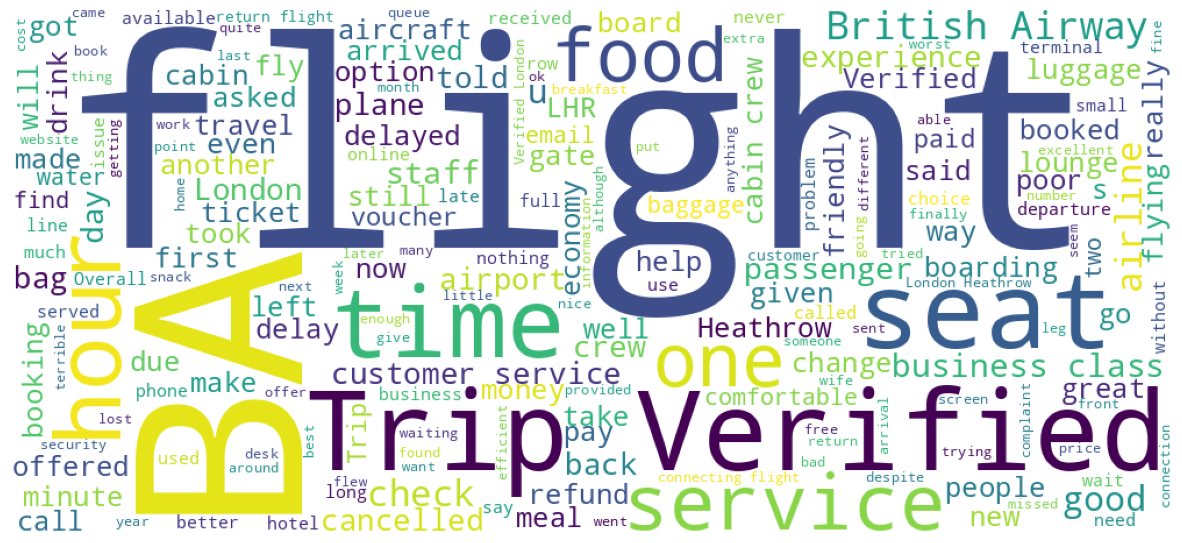

In [ ]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

From the wordcloud above, we can see the key of topics in customer review are flight, seat , service and time. showing that people are actively talking about their experience on the plane and the staff.

### Satisfaction of customer

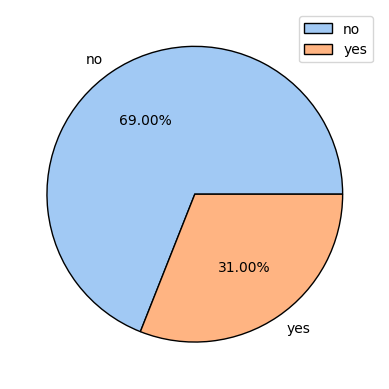

In [ ]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

From the pie chart above, we know that 63.3% of passengers are dissatisfied with British Airways services. let's breakdown the data to found what make passengers dissatisfied :

### View rating of BA service by passenger that dissatisfied with British Airways

In [ ]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,602.00000,592.000000,486.000000,339.000000,633.000000,223.000000,690.000000
mean,2.08804,2.418919,1.858025,2.176991,1.755134,1.556054,1.500000
std,1.11138,1.316374,1.069930,1.213070,1.149467,0.988787,0.808608
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.00000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.00000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Analysis food on airways

In [ ]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

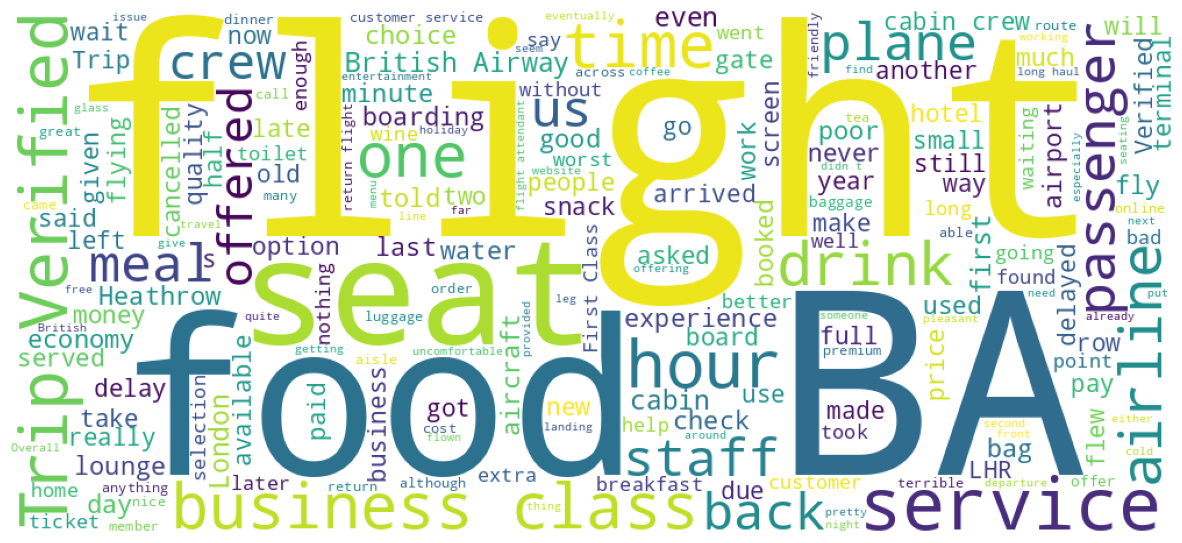

In [ ]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

I analyse the test.csv file, and get information that :

1. Time to deliver the order is too long
2. For free catering just bottle of water and a packet of crisps
3. Minimal selection of food items for purchase.

### Analysis value for money

In [ ]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

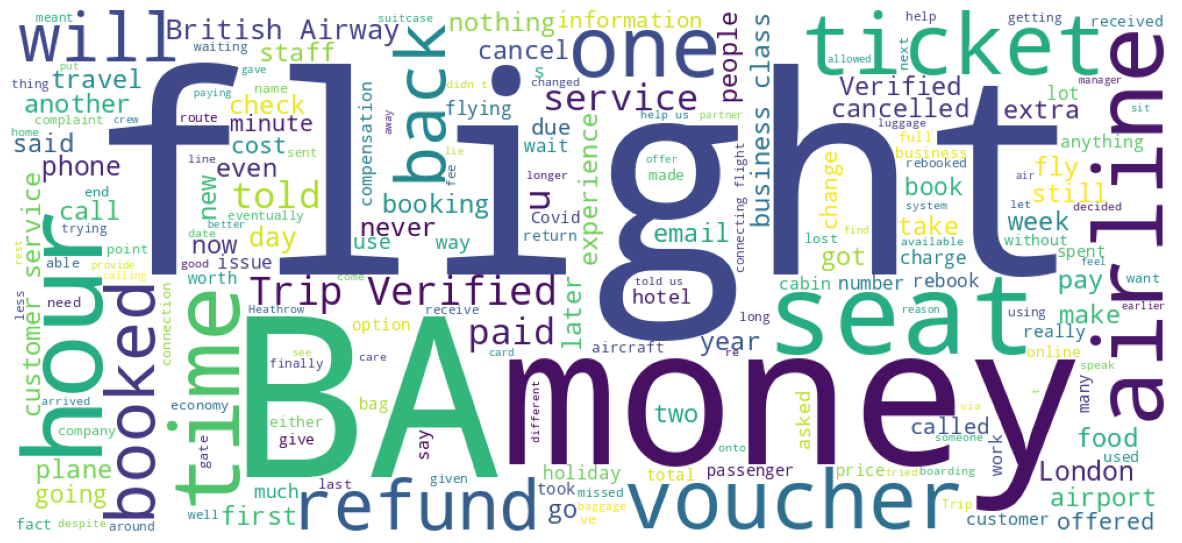

In [ ]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

what I get from analysis the data :
1. The refund take a lot of time
2. Forced to use of vouchers however it was useless
3. Long delay time